In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("TSLA.csv")
data

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500
1,1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500
2,2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000
3,3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000
4,4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500
...,...,...,...,...,...,...,...
3529,3529,2024-07-09,251.000000,265.609985,250.300003,262.329987,160210900
3530,3530,2024-07-10,262.799988,267.589996,257.859985,263.260010,128519400
3531,3531,2024-07-11,263.299988,271.000000,239.649994,241.029999,221707300
3532,3532,2024-07-12,235.800003,251.839996,233.089996,248.229996,155694400


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
data = pd.read_csv('TSLA.csv')

data['Date'] = pd.to_datetime(data['Date'])

X = data.drop(['Close', 'Date', 'Unnamed: 0'], axis=1)  # Predicting 'Close' price
y = data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['Open', 'High', 'Low', 'Volume']  # Specify the correct numeric columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)

    ])


model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:.2f}")
print(f"R2 score: {r2:.2f}")

numeric_importance = model.named_steps['regressor'].coef_[:len(numeric_features)]
feature_importance = pd.DataFrame({'feature': numeric_features, 'importance': np.abs(numeric_importance)})
print("\nFeature Importance:")
print(feature_importance.sort_values('importance', ascending=False))


Mean squared error: 3.18
R2 score: 1.00

Feature Importance:
  feature  importance
1    High   88.898816
2     Low   83.621774
0    Open   70.580685
3  Volume    0.037798


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Mean squared error: 5.02
R2 score: 1.00


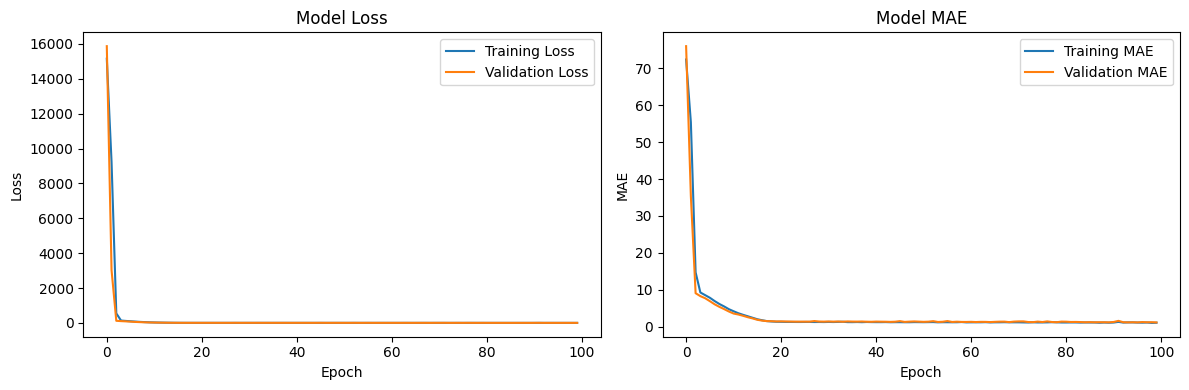

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('TSLA.csv')  # Replace with your actual file name

# Convert the 'Date' column to datetime format if necessary
data['Date'] = pd.to_datetime(data['Date'])

# Separate features and target
X = data.drop(['Close', 'Date', 'Unnamed: 0'], axis=1)  # Predicting 'Close' price
y = data['Close']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numerical columns
numeric_features = ['Open', 'High', 'Low', 'Volume']  # Specify the correct numeric columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Fit the preprocessor and transform the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Get the number of features after preprocessing
n_features = X_train_processed.shape[1]

# Define the neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(n_features,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(
    X_train_processed, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=0
)

# Evaluate the model
y_pred = model.predict(X_test_processed)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:.2f}")
print(f"R2 score: {r2:.2f}")

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


In [9]:
 def backward(self, X, y, y_hat, learning_rate):
    # Backpropagation
    delta2 = (y_hat - y) * self.sigmoid_derivative(self.z2)
    delta1 = delta2.dot(self.weights2.T) * self.sigmoid_derivative(self.z1)
    self.weights2 -= learning_rate * self.a1.T.dot(delta2)
    self.weights1 -= learning_rate * X.T.dot(delta1)

def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(self, z):
    return self.sigmoid(z) * (1 - self.sigmoid(z))

In [10]:
class NeuralNetwork:
    def _init_(self, input_size, hidden_size, output_size):
        # Initialize weights randomly
        self.weights1 = np.random.randn(input_size, hidden_size)
        self.weights2 = np.random.randn(hidden_size, output_size)


    def forward(self, X):
        # Forward propagation
        self.z1 = np.dot(X, self.weights1)
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.weights2)
        self.y_hat = self.sigmoid(self.z2)
        return self.y_hat

    def backward(self, X, y, y_hat, learning_rate):
        # Backpropagation
        delta2 = (y_hat - y) * self.sigmoid_derivative(self.z2)
        delta1 = delta2.dot(self.weights2.T) * self.sigmoid_derivative(self.z1)
        self.weights2 -= learning_rate * self.a1.T.dot(delta2)
        self.weights1 -= learning_rate * X.T.dot(delta1)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))


In [11]:
# Separate features (X) and target variable (y)
# Assuming you want to predict the 'Close' price of the Tesla stock using the other available features
X = data.drop('Close', axis=1)  # Use all columns except 'Close' as features
y = data['Close']  # 'Close' price is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


Training set shape: (2827, 6)
Testing set shape: (707, 6)
Training target shape: (2827,)
Testing target shape: (707,)


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Define numeric features for the Tesla dataset
numeric_features = ['Open', 'High', 'Low', 'Volume']  # Use relevant numeric columns

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_features)
    ])

# Fit the preprocessor on the training data and transform both training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Scaling the data after imputation
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train_processed)
X_test_processed = scaler.transform(X_test_processed)

print("Processed training set shape:", X_train_processed.shape)
print("Processed testing set shape:", X_test_processed.shape)


Processed training set shape: (2827, 4)
Processed testing set shape: (707, 4)
